In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [9]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print(x_train.shape)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#    print("f",x_train.shape)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    print("f1",x_train.shape)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

(60000, 28, 28)
f1 (60000, 28, 28, 1)


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## CNN with kernel size(2,2)

### Layers=3

In [18]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (2, 2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.2187 - acc: 0.9332 - val_loss: 0.0616 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.0518 - acc: 0.9842 - val_loss: 0.0615 - val_acc: 0.9794
Epoch 3/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0302 - acc: 0.9905 - val_loss: 0.0367 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.0359 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0101 - acc: 0.9968 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0064 - acc: 0.9981 - val_loss: 0.0427 - val_acc: 0.9882
Epoch 7/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0047 - acc: 0.9983 - val_loss: 0.

#### Error plot

Test score: 0.053739985609836484
Test accuracy: 0.9896


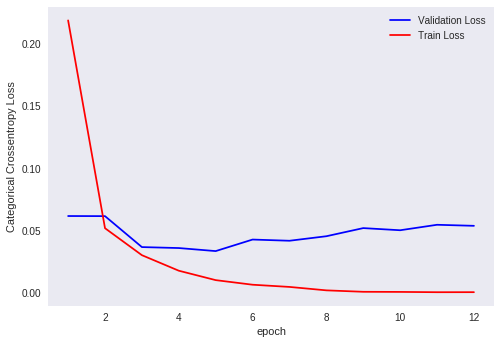

In [19]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 Convolution layers, the accuracy is good and is 
       the least at 3 epochs.
    2. The accuracy is around 98.96%.
    3. We've used kernel size 2x2 here.
    4. The loss is minimized significantly.

#### Violin plot



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


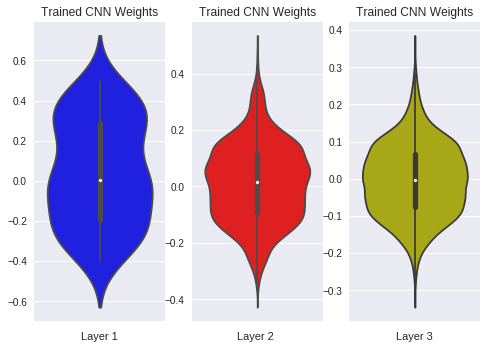

In [28]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Layer 3')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly around 
       -0.2.to 0.4
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.


#### Dropout+Maxpooling

In [37]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 265us/step - loss: 0.2769 - acc: 0.9155 - val_loss: 0.0843 - val_acc: 0.9751
Epoch 2/12
60000/60000 [==============================] - 15s 248us/step - loss: 0.0760 - acc: 0.9771 - val_loss: 0.0563 - val_acc: 0.9826
Epoch 3/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0491 - acc: 0.9849 - val_loss: 0.0409 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0353 - acc: 0.9889 - val_loss: 0.0387 - val_acc: 0.9869
Epoch 5/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0252 - acc: 0.9919 - val_loss: 0.0415 - val_acc: 0.9878
Epoch 6/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0199 - acc: 0.9934 - val_loss: 0.0420 - val_acc: 0.9877
Epoch 7/12
60000/60000 [==============================] - 15s 246us/step - loss: 0.0148 - acc: 0.9953 - val_loss: 0.

#### Error plot

Test score: 0.04998063442788698
Test accuracy: 0.9883


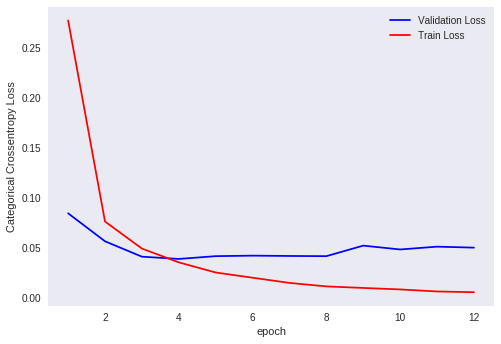

In [38]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 Convolution layers, the accuracy is good and is 
       the least at 2 epochs.
    2. The accuracy is around 98.8%.
    3. We've used kernel size 2x2 here.
    4. The loss is minimized significantly.
    5. We've used Drop out and Maxpooling here.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


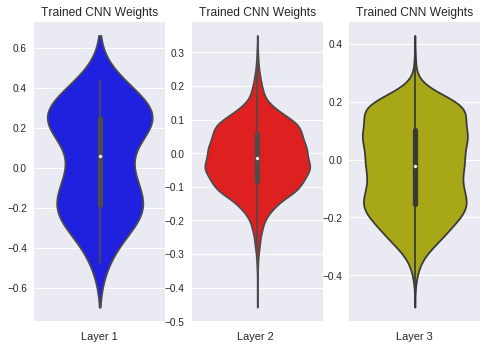

In [40]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Layer 3')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly around -0.2 
       to 0.4.
    2. The weights of convolution layer 2 are centered around 
       1.0.
    3. The weights of convolution layer 3 are centered around
       0.1.


### Layers=5

In [29]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(8, (2, 2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 223us/step - loss: 0.2770 - acc: 0.9162 - val_loss: 0.0735 - val_acc: 0.9751
Epoch 2/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.0603 - acc: 0.9814 - val_loss: 0.0550 - val_acc: 0.9815
Epoch 3/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.0450 - val_acc: 0.9856
Epoch 4/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0178 - acc: 0.9943 - val_loss: 0.0463 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0101 - acc: 0.9968 - val_loss: 0.0539 - val_acc: 0.9858
Epoch 6/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0061 - acc: 0.9983 - val_loss: 0.0583 - val_acc: 0.9864
Epoch 7/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0032 - acc: 0.9992 - val_loss: 0.

#### Error plot

Test score: 0.0905094974575037
Test accuracy: 0.9879


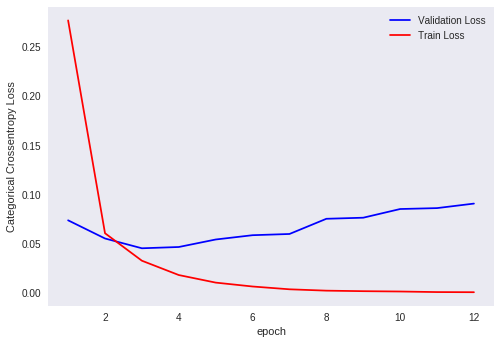

In [31]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 Convolution layers, the accuracy is good and is 
       the least at 3 epochs.
    2. The accuracy is around 98.96%.
    3. We've used kernel size 2x2 here.
    4. The loss is minimized significantly.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


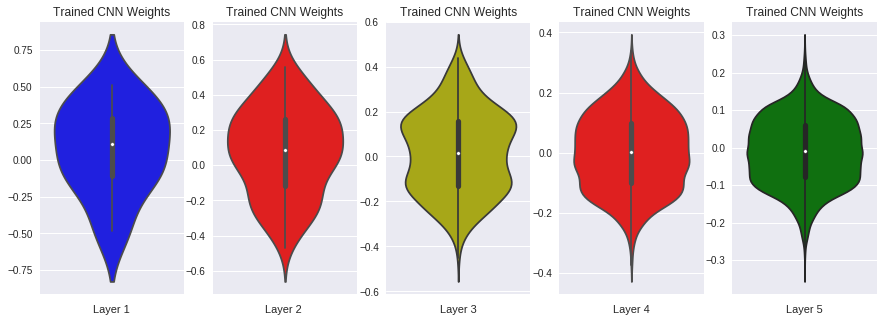

In [36]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h4_w,color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Layer 5')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly centered around 0.
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.1.
    4. The weights of convolution layer 4 are centered around 0.
    5. The weights of convolution layer 5 are centered around 0.

### dropout+maxpooling

In [41]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(2, 2),
                 activation='relu',input_shape=input_shape))
model.add(Dropout(0.12))
model.add(Conv2D(8, (2, 2), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(Dropout(0.50))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.50))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 277us/step - loss: 0.3637 - acc: 0.8867 - val_loss: 0.1664 - val_acc: 0.9556
Epoch 2/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.1427 - acc: 0.9567 - val_loss: 0.0974 - val_acc: 0.9722
Epoch 3/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.1008 - acc: 0.9685 - val_loss: 0.0820 - val_acc: 0.9759
Epoch 4/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0775 - acc: 0.9756 - val_loss: 0.0582 - val_acc: 0.9827
Epoch 5/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0617 - acc: 0.9803 - val_loss: 0.0498 - val_acc: 0.9843
Epoch 6/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0519 - acc: 0.9836 - val_loss: 0.0460 - val_acc: 0.9851
Epoch 7/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0434 - acc: 0.9867 - val_loss: 0.

####Error plot

Test score: 0.040739867879057416
Test accuracy: 0.9872


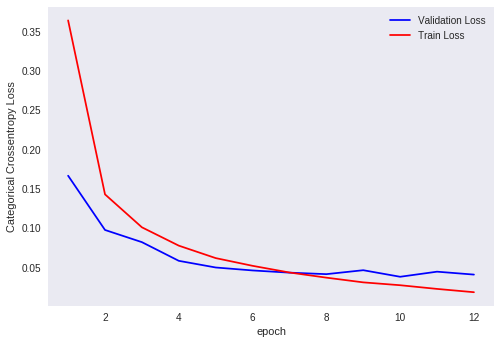

In [42]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 Convolution layers, the accuracy is good and is 
       the least at 2 epochs.
    2. The accuracy is around 98.72%.
    3. We've used kernel size 2x2 here.
    4. The loss is minimized significantly.
    5. We've used Drop out and Maxpooling here.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


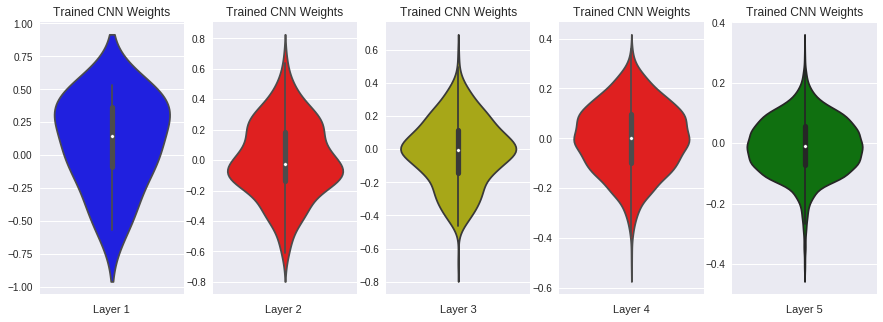

In [44]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h4_w,color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Layer 5')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly centered around 0.25.
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.
    4. The weights of convolution layer 4 are centered around 0.
    5. The weights of convolution layer 5 are centered around 0.

## Summary

In [1]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Activation", "Number of layers","kernel size","Optimizer", " Optimization Features","MaxPooling", "Test score","Test accuracy"]

x.add_row(["ReLU",3,"2x2","Adadelta","None","not present",0.05,0.989])
x.add_row(["ReLU",3,"2x2","Adadelta","Dropout","present",0.04,0.988])
x.add_row(["ReLU",5,"2x2","Adadelta","None","not present",0.09,0.987])
x.add_row(["ReLU",5,"2x2","Adadelta","Dropout","present",0.04,0.987])



print(x)

+------------+------------------+-------------+-----------+------------------------+-------------+------------+---------------+
| Activation | Number of layers | kernel size | Optimizer |  Optimization Features |  MaxPooling | Test score | Test accuracy |
+------------+------------------+-------------+-----------+------------------------+-------------+------------+---------------+
|    ReLU    |        3         |     2x2     |  Adadelta |          None          | not present |    0.05    |     0.989     |
|    ReLU    |        3         |     2x2     |  Adadelta |        Dropout         |   present   |    0.04    |     0.988     |
|    ReLU    |        5         |     2x2     |  Adadelta |          None          | not present |    0.09    |     0.987     |
|    ReLU    |        5         |     2x2     |  Adadelta |        Dropout         |   present   |    0.04    |     0.987     |
+------------+------------------+-------------+-----------+------------------------+-------------+------

## CNN with kernel size(3,3)

### With Layers=3

In [45]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 217us/step - loss: 0.1777 - acc: 0.9451 - val_loss: 0.0613 - val_acc: 0.9796
Epoch 2/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0507 - val_acc: 0.9835
Epoch 3/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0266 - acc: 0.9919 - val_loss: 0.0343 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0166 - acc: 0.9949 - val_loss: 0.0302 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.0104 - acc: 0.9969 - val_loss: 0.0398 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0363 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.

#### Error Plot

Test score: 0.05653812735165759
Test accuracy: 0.9896


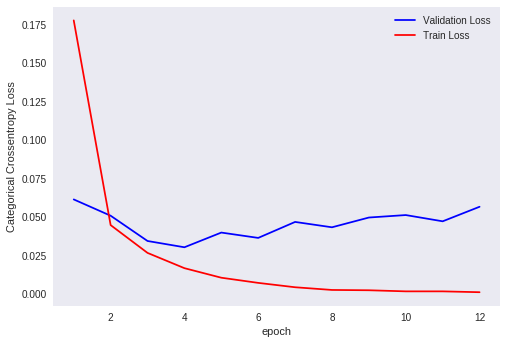

In [46]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 Convolution layers, the accuracy is good and is 
       the least at 2 epochs.
    2. The accuracy is around 98.96%.
    3. We've used kernel size 3x3 here.
    4. The loss is minimized significantly.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


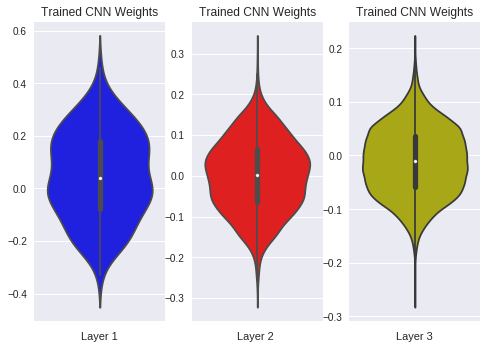

In [47]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Layer 3')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly centered around 0.
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.


#### Dropout+Maxpooling

In [48]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.2449 - acc: 0.9246 - val_loss: 0.0844 - val_acc: 0.9750
Epoch 2/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0579 - acc: 0.9822 - val_loss: 0.0359 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0396 - acc: 0.9874 - val_loss: 0.0386 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0283 - acc: 0.9911 - val_loss: 0.0330 - val_acc: 0.9879
Epoch 5/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0219 - acc: 0.9932 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0183 - acc: 0.9941 - val_loss: 0.0302 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.

#### Error Plot

Test score: 0.037130747645408704
Test accuracy: 0.9904


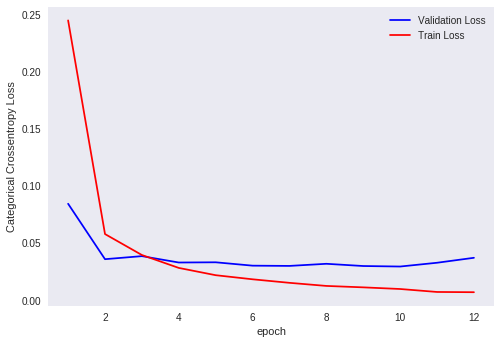

In [49]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 Convolution layers, the accuracy is good and is 
       the least at 3 epochs.
    2. The accuracy is around 99.0%.
    3. We've used kernel size 3x3 here.
    4. The loss is minimized significantly.
    5. We've used Drop out and Maxpooling here.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


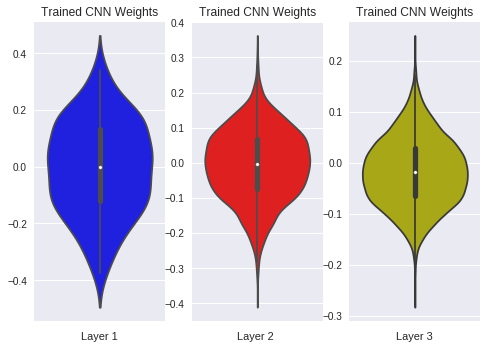

In [50]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Layer 3')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly centered around 0.
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.


### With Layers=5

In [51]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.2067 - acc: 0.9380 - val_loss: 0.0541 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0447 - acc: 0.9861 - val_loss: 0.0322 - val_acc: 0.9892
Epoch 3/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0273 - acc: 0.9917 - val_loss: 0.0335 - val_acc: 0.9900
Epoch 4/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.0316 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 11s 189us/step - loss: 0.0117 - acc: 0.9964 - val_loss: 0.0346 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0076 - acc: 0.9977 - val_loss: 0.0379 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.0049 - acc: 0.9985 - val_loss: 0.

#### Error plot

Test score: 0.06472233246219374
Test accuracy: 0.9908


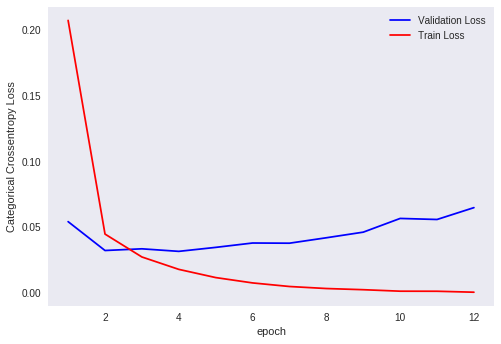

In [52]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 Convolution layers, the accuracy is good and is 
       the least at 3 epochs.
    2. The accuracy is around 99.08%.
    3. We've used kernel size 3x3 here.
    4. The loss is minimized significantly.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


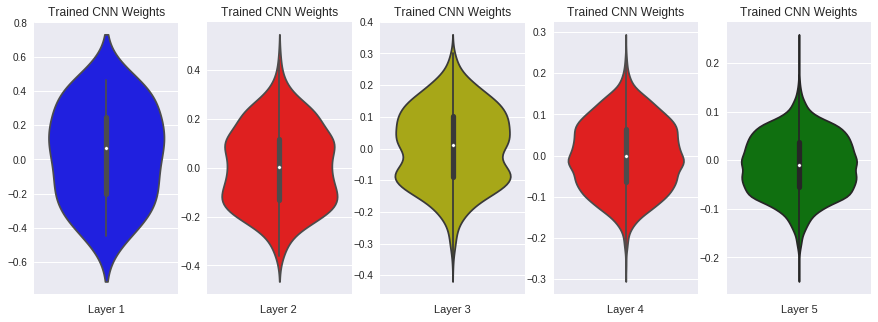

In [53]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h4_w,color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Layer 5')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly centered around 0.
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.
    4. The weights of convolution layer 4 are centered around 0.
    5. The weights of convolution layer 5 are centered around 0.

#### Dropout+Maxpooling

In [54]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',input_shape=input_shape))
model.add(Dropout(0.12))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Dropout(0.50))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.50))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 225us/step - loss: 0.3500 - acc: 0.8884 - val_loss: 0.0973 - val_acc: 0.9710
Epoch 2/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0839 - acc: 0.9736 - val_loss: 0.0458 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0583 - acc: 0.9819 - val_loss: 0.0579 - val_acc: 0.9838
Epoch 4/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0458 - acc: 0.9855 - val_loss: 0.0335 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0361 - acc: 0.9886 - val_loss: 0.0296 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0305 - acc: 0.9903 - val_loss: 0.0282 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0255 - acc: 0.9916 - val_loss: 0.

#### Error plot

Test score: 0.02615390056807082
Test accuracy: 0.9916


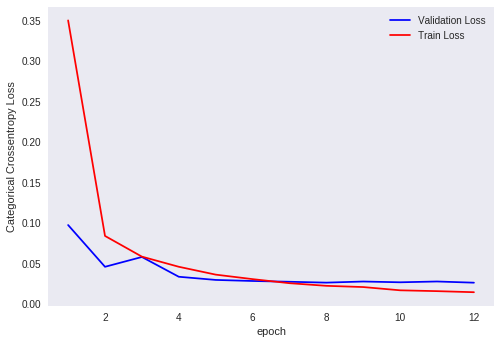

In [55]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 Convolution layers, the accuracy is good and is 
       the least at 3 epochs.
    2. The accuracy is around 99.16%.
    3. We've used kernel size 3x3 here.
    4. The loss is minimized significantly.
    5. We've used Drop out and Maxpooling here.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


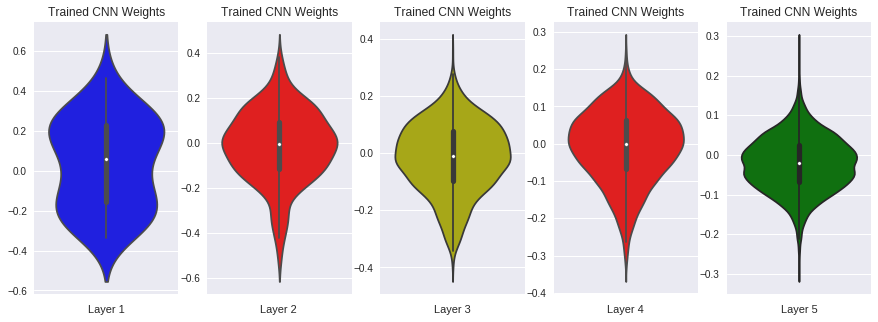

In [56]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h4_w,color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Layer 5')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly around -0.2 to 0.2.
    2. The weights of convolution layer 2 are centered around 1.0.
    3. The weights of convolution layer 3 are centered around 0.1.
    4. The weights of convolution layer 4 are centered around 0.1.
    5. The weights of convolution layer 5 are centered around 0.1.

## Summary

In [2]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Activation", "Number of layers","kernel size","Optimizer", " Optimization Features","MaxPooling", "Test score","Test accuracy"]

x.add_row(["ReLU",3,"3x3","Adadelta","None","not present",0.05,0.989])
x.add_row(["ReLU",3,"3x3","Adadelta","Dropout","present",0.03,0.990])
x.add_row(["ReLU",5,"3x3","Adadelta","None","not present",0.06,0.990])
x.add_row(["ReLU",5,"3x3","Adadelta","Dropout","present",0.02,0.991])



print(x)

+------------+------------------+-------------+-----------+------------------------+-------------+------------+---------------+
| Activation | Number of layers | kernel size | Optimizer |  Optimization Features |  MaxPooling | Test score | Test accuracy |
+------------+------------------+-------------+-----------+------------------------+-------------+------------+---------------+
|    ReLU    |        3         |     3x3     |  Adadelta |          None          | not present |    0.05    |     0.989     |
|    ReLU    |        3         |     3x3     |  Adadelta |        Dropout         |   present   |    0.03    |      0.99     |
|    ReLU    |        5         |     3x3     |  Adadelta |          None          | not present |    0.06    |      0.99     |
|    ReLU    |        5         |     3x3     |  Adadelta |        Dropout         |   present   |    0.02    |     0.991     |
+------------+------------------+-------------+-----------+------------------------+-------------+------

## With kernel size(5,5)

### With layers=3

In [57]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 189us/step - loss: 0.1778 - acc: 0.9460 - val_loss: 0.0459 - val_acc: 0.9842
Epoch 2/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0413 - acc: 0.9873 - val_loss: 0.0371 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0264 - acc: 0.9920 - val_loss: 0.0329 - val_acc: 0.9900
Epoch 4/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0176 - acc: 0.9941 - val_loss: 0.0289 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0130 - acc: 0.9962 - val_loss: 0.0271 - val_acc: 0.9915
Epoch 6/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0368 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0391 -

#### Error Plot

Test score: 0.046837767455708605
Test accuracy: 0.991


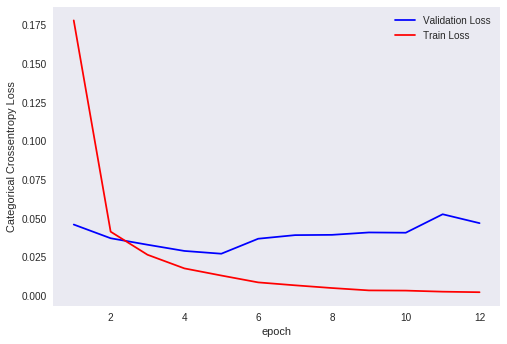

In [58]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 Convolution layers, the accuracy is good and is 
       the least at 2 epochs.
    2. The accuracy is around 99.1%.
    3. We've used kernel size 5x5 here.
    4. The loss is minimized significantly.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


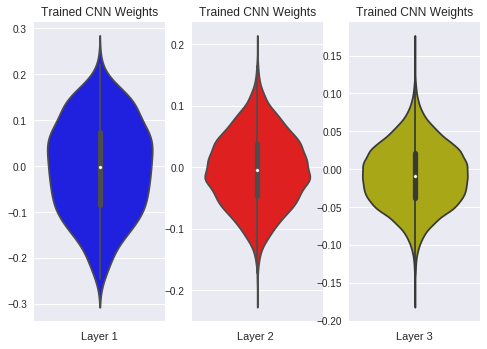

In [59]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Layer 3')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly around -0.1 to 0.1.
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.

#### Dropout+maxpooling

In [60]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 186us/step - loss: 0.2242 - acc: 0.9278 - val_loss: 0.0571 - val_acc: 0.9832
Epoch 2/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0582 - acc: 0.9817 - val_loss: 0.0353 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0397 - acc: 0.9879 - val_loss: 0.0272 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0328 - acc: 0.9902 - val_loss: 0.0356 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0259 - acc: 0.9918 - val_loss: 0.0285 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0248 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0187 - acc: 0.9943 - val_loss: 0.0224 -

#### Error plot

Test score: 0.019163496904772818
Test accuracy: 0.9942


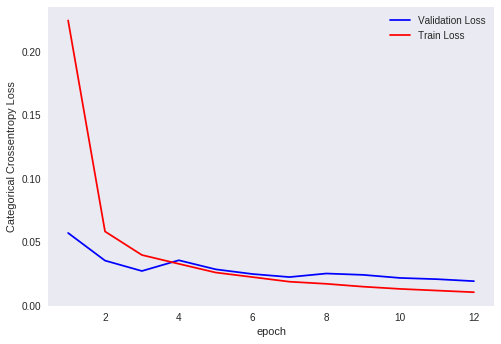

In [61]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 Convolution layers, the accuracy is good and is 
       the least at 3 epochs.
    2. The accuracy is around 99.42%.
    3. We've used kernel size 5x5 here.
    4. The loss is minimized significantly.
    5. We've used Drop out and Maxpooling here.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


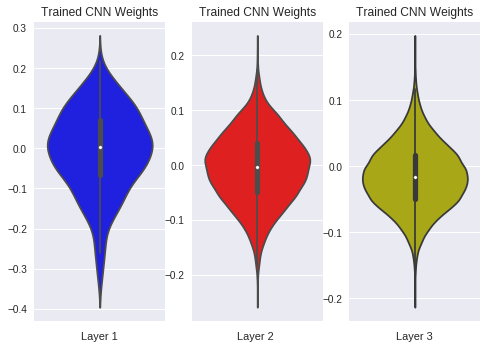

In [62]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Layer 3')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly centered around 0.
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.

### With layers=5

In [63]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.2533 - acc: 0.9196 - val_loss: 0.0734 - val_acc: 0.9780
Epoch 2/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0579 - acc: 0.9818 - val_loss: 0.0414 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0373 - acc: 0.9882 - val_loss: 0.0381 - val_acc: 0.9883
Epoch 4/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0282 - acc: 0.9908 - val_loss: 0.0369 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 9s 142us/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0401 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0173 - acc: 0.9942 - val_loss: 0.0371 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 9s 142us/step - loss: 0.0130 - acc: 0.9961 - val_loss: 0.0387 -

#### Error plot

Test score: 0.04846479935222246
Test accuracy: 0.9908


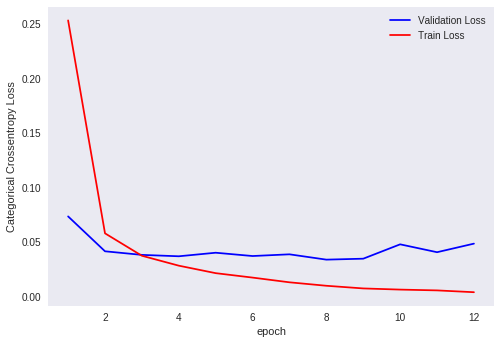

In [64]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 Convolution layers, the accuracy is good and is 
       the least at 2 epochs.
    2. The accuracy is around 99.08%.
    3. We've used kernel size 5x5 here.
    4. The loss is minimized significantly

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


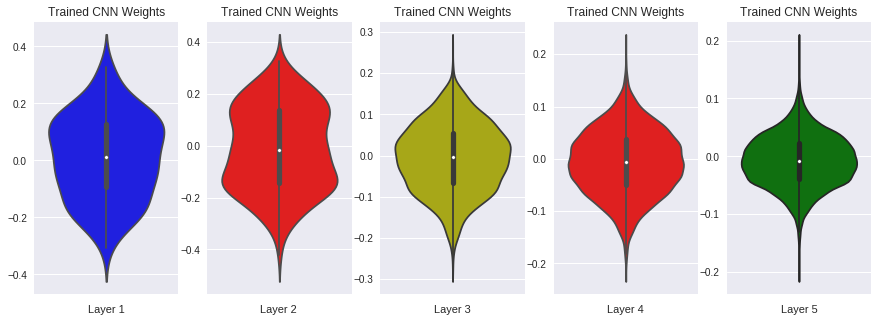

In [65]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h4_w,color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Layer 5')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly around -0.2 to 0.2
    2. The weights of convolution layer 2 are around -0.2 to 0.2
    3. The weights of convolution layer 3 are centered around 0.1.
    4. The weights of convolution layer 4 are centered around 0.1.
    5. The weights of convolution layer 5 are centered around 0.1.

#### dropout+Maxpooling

In [66]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(5, 5),
                 activation='relu',input_shape=input_shape))
model.add(Dropout(0.12))
model.add(Conv2D(8, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(Dropout(0.50))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Dropout(0.50))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.4138 - acc: 0.8652 - val_loss: 0.1261 - val_acc: 0.9615
Epoch 2/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.1087 - acc: 0.9660 - val_loss: 0.0795 - val_acc: 0.9754
Epoch 3/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0781 - acc: 0.9761 - val_loss: 0.0422 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0664 - acc: 0.9795 - val_loss: 0.0426 - val_acc: 0.9869
Epoch 5/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0561 - acc: 0.9820 - val_loss: 0.0343 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0484 - acc: 0.9846 - val_loss: 0.0341 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0338 -

#### Error plot

Test score: 0.024883154391590504
Test accuracy: 0.9924


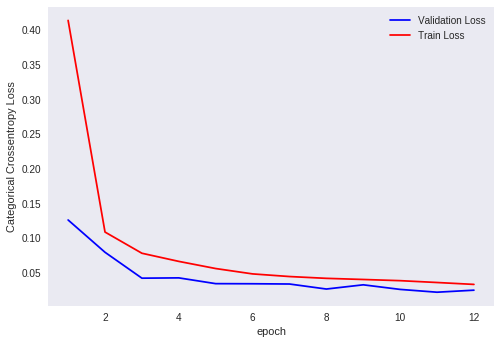

In [67]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 Convolution layers, the accuracy is good and is 
       the least at 3 epochs.
    2. The accuracy is around 99.24%.
    3. We've used kernel size 5x5 here.
    4. The loss is minimized significantly.
    5. We've used Drop out and Maxpooling here.

#### Violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


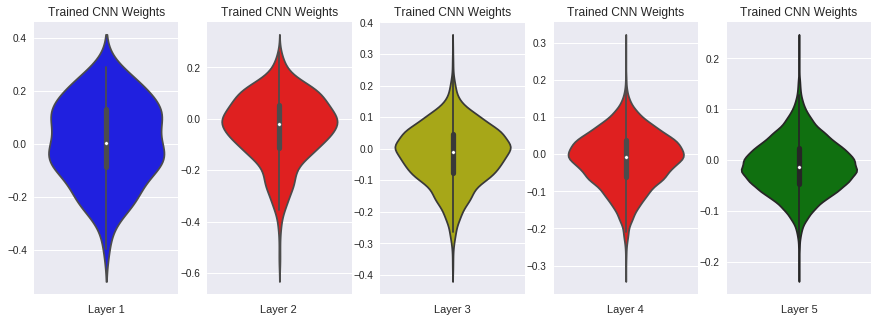

In [69]:
import seaborn as sns
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h4_w,color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained CNN Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Layer 5')
plt.show()

#### Observations
    1. The weights of convolution layer 1 are mostly around -0.2 to 0.2
    2. The weights of convolution layer 2 are centered around 0.
    3. The weights of convolution layer 3 are centered around 0.
    4. The weights of convolution layer 4 are centered around 0.
    5. The weights of convolution layer 5 are centered around 0.

## Summary

In [3]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Activation", "Number of layers","kernel size","Optimizer", " Optimization Features","MaxPooling", "Test score","Test accuracy"]

x.add_row(["ReLU",3,"5x5","Adadelta","None","not present",0.04,0.991])
x.add_row(["ReLU",3,"5x5","Adadelta","Dropout","present",0.01,0.994])
x.add_row(["ReLU",5,"5x5","Adadelta","None","not present",0.04,0.990])
x.add_row(["ReLU",5,"5x5","Adadelta","Dropout","present",0.02,0.992])



print(x)

+------------+------------------+-------------+-----------+------------------------+-------------+------------+---------------+
| Activation | Number of layers | kernel size | Optimizer |  Optimization Features |  MaxPooling | Test score | Test accuracy |
+------------+------------------+-------------+-----------+------------------------+-------------+------------+---------------+
|    ReLU    |        3         |     5x5     |  Adadelta |          None          | not present |    0.04    |     0.991     |
|    ReLU    |        3         |     5x5     |  Adadelta |        Dropout         |   present   |    0.01    |     0.994     |
|    ReLU    |        5         |     5x5     |  Adadelta |          None          | not present |    0.04    |      0.99     |
|    ReLU    |        5         |     5x5     |  Adadelta |        Dropout         |   present   |    0.02    |     0.992     |
+------------+------------------+-------------+-----------+------------------------+-------------+------

## Final Observations
    1. We've tried out various CNN architectures on MNIST dataset.
    2. We've used google colaboratory which has significatnly fastened the computation time
    3. We find that as number of hidden layers increase, the model tends to overfit.
    4. We've used ReLU activation for all our models.
    5. The models perform better with maxpooling.
    6. In optimization, We've used Adadelta and dropouts.